# Zimnat Insurance Recommendation Challenge - Zindi
**Client: Zimnat Insurance**
Insurance companies pool and spread risk across a broad customer base. This works best where the population to be insured is diverse and large. Understanding the varied insurance needs of a population, and matching them to appropriate products offered by insurance companies, makes insurance more effective and makes insurance companies more successful. At the heart of this, understanding the consumer of insurance products helps insurance companies refine, diversify, and market their product offerigs. Increased data collection and improved data science tools offer the chance to greatly improve this understanding.

Zimnat Insurance wants a ML model to use customer data to predict which kinds of insurance products to recommend to customers. We will therefore, leverage data and ML methods to improve market outcomes for the company by matching consumer needs with product offerings in the Zimbabwean Insurance market.

Our data is of nearly 40,000 customers who have purchased two or more insurance products from Zimnat. The data can be accessed [here](https://zindi.africa/competitions/zimnat-insurance-recommendation-challenge/data). The data is divided into Train and Test sets. For both sets, each row corresponds to a customer, assigned a unique ID('ID'). Each set also has customer related information ('join_data', 'sex','marital_status', 'birth_year', 'occupation_code', 'occupation_category_code'). The branch code of the customer ('branch_code') is also provided. The rest of the data corresponds to the 21 products on offer.

For each product that a customer has, there is 1 in the column and 0 if the customer doesn't have that product. This is true for both train and test set except that for each customer, ONE product has been removed in the test set, i.e. the 1 has been replaced with a 0. The goal is to predict this missing product.

We will start with Data Exploration before building the model.

To come up with a ML model we first need to understand the data we are working with. We'll therefore conduct different Exploratory Data Analysis.

## Exploratory Data Analysis

We'll start with getting our data into a dataframe for easy understanding and analysis. To do this we start with importing the libraries to help us with data analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

Then we read our data and store them in a dataframe. We'll read three sets of data, the train data, the test data, and the sample submission file to understand the format required for submission.

In [4]:
train_data = pd.read_csv('C:/Users/kiiru/10acadWeeklyChallenges/Zindi Challenges/Zimnat Insurance Recommendation/data/train.csv')
test_data = pd.read_csv('C:/Users/kiiru/10acadWeeklyChallenges/Zindi Challenges/Zimnat Insurance Recommendation/data/test.csv')
submission_file = pd.read_csv('C:/Users/kiiru/10acadWeeklyChallenges/Zindi Challenges/Zimnat Insurance Recommendation/data/samplesubmission.csv')

Then we go ahead to inspect the dataframes to analyse if they have been imported in the right format and use a few function like `.info()` to understand the basics of the data.

In [5]:
test_data.head()

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,...,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,F86J5PC,1/12/2018,M,M,1984,94KC,DZRV,90QI,0,0,...,0,0,0,0,0,0,0,0,0,0
1,H6141K3,1/10/2019,M,M,1996,1X1H,J9SY,90QI,0,0,...,0,0,0,1,0,0,0,0,0,0
2,RBAYUXZ,1/1/2020,F,W,1968,UAOD,2A7I,T4MS,0,0,...,0,0,0,1,0,0,0,0,0,0
3,KCBILBQ,1/2/2019,M,M,1989,94KC,2A7I,T4MS,0,0,...,0,0,0,0,0,0,0,0,0,0
4,LSEC1ZJ,1/2/2020,F,M,1982,UAOD,0KID,T4MS,0,0,...,0,0,0,0,0,0,1,0,0,0


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        10000 non-null  object
 1   join_date                 9999 non-null   object
 2   sex                       10000 non-null  object
 3   marital_status            10000 non-null  object
 4   birth_year                10000 non-null  int64 
 5   branch_code               10000 non-null  object
 6   occupation_code           10000 non-null  object
 7   occupation_category_code  10000 non-null  object
 8   P5DA                      10000 non-null  int64 
 9   RIBP                      10000 non-null  int64 
 10  8NN1                      10000 non-null  int64 
 11  7POT                      10000 non-null  int64 
 12  66FJ                      10000 non-null  int64 
 13  GYSR                      10000 non-null  int64 
 14  SOP4                   

In [6]:
train_data.head()

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,...,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,4WKQSBB,1/2/2019,F,M,1987,1X1H,2A7I,T4MS,0,0,...,0,0,0,1,0,0,0,0,0,0
1,CP5S02H,1/6/2019,F,M,1981,UAOD,2A7I,T4MS,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2YKDILJ,1/6/2013,M,U,1991,748L,QZYX,90QI,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2S9E81J,1/8/2019,M,M,1990,1X1H,BP09,56SI,0,0,...,0,0,0,1,0,0,0,0,0,0
4,BHDYVFT,1/8/2019,M,M,1990,748L,NO3L,T4MS,0,0,...,0,0,0,0,0,0,1,1,0,0


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29132 entries, 0 to 29131
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        29132 non-null  object
 1   join_date                 29130 non-null  object
 2   sex                       29132 non-null  object
 3   marital_status            29132 non-null  object
 4   birth_year                29132 non-null  int64 
 5   branch_code               29132 non-null  object
 6   occupation_code           29132 non-null  object
 7   occupation_category_code  29132 non-null  object
 8   P5DA                      29132 non-null  int64 
 9   RIBP                      29132 non-null  int64 
 10  8NN1                      29132 non-null  int64 
 11  7POT                      29132 non-null  int64 
 12  66FJ                      29132 non-null  int64 
 13  GYSR                      29132 non-null  int64 
 14  SOP4                  

In [7]:
submission_file.head()

,ID X PCODE,Label
0,F86J5PC X P5DA,0
1,F86J5PC X RIBP,0
2,F86J5PC X 8NN1,0
3,F86J5PC X 7POT,0
4,F86J5PC X 66FJ,0


In [10]:
submission_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210000 entries, 0 to 209999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ID X PCODE  210000 non-null  object
 1   Label       210000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.2+ MB


The submission file simply tells us how we need our data to be for submission purposes.

Next we analyse the number of unique values for each data set using `.nunique()`.

In [11]:
train_data.nunique()

ID                          29132
join_date                     132
sex                             2
marital_status                  8
birth_year                     61
branch_code                    15
occupation_code               233
occupation_category_code        6
P5DA                            2
RIBP                            2
8NN1                            2
7POT                            2
66FJ                            2
GYSR                            2
SOP4                            2
RVSZ                            2
PYUQ                            2
LJR9                            2
N2MW                            2
AHXO                            2
BSTQ                            2
FM3X                            2
K6QO                            2
QBOL                            2
JWFN                            2
JZ9D                            2
J9JW                            2
GHYX                            2
ECY3                            2
dtype: int64

In [12]:
test_data.nunique()

ID                          10000
join_date                     126
sex                             2
marital_status                  8
birth_year                     55
branch_code                    15
occupation_code               187
occupation_category_code        6
P5DA                            2
RIBP                            2
8NN1                            2
7POT                            2
66FJ                            2
GYSR                            2
SOP4                            2
RVSZ                            2
PYUQ                            2
LJR9                            2
N2MW                            2
AHXO                            2
BSTQ                            2
FM3X                            2
K6QO                            2
QBOL                            2
JWFN                            2
JZ9D                            2
J9JW                            2
GHYX                            2
ECY3                            2
dtype: int64

We can see from the unique values that all products have only two unique values which is 0 and 1 where 0 indicates that the customer has not purchased the product and 1 to indicate that the customer has purchases the product.

From our submission file format, we notice that the main feature related to the label is a customer's ID concatenated to each product. Therefore, we will transform all our products to one column and concatenate it with the customer ID so as to also have one target variable: `Label`

In [13]:
products =train_data[['P5DA', 'RIBP', '8NN1', '7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ', 'LJR9', 'N2MW', 'AHXO', 'BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D', 'J9JW', 'GHYX', 'ECY3']]

In [14]:
train = train_data.melt(id_vars=train_data.columns[:8], value_vars=products, var_name='PCODE', value_name='Label')
test = test_data.melt(id_vars=test_data.columns[:8], value_vars=products, var_name='PCODE', value_name='Label')

In [15]:
train['ID X PCODE'] = train['ID'] + ' X ' + train['PCODE']
test['ID X PCODE'] = test['ID'] + ' X ' + test['PCODE']

Now that we have only one target variable, we can inspect the balance of our target variable to know if we are dealing with a balanced or an imbalanced class.

We will check the class imbalance in both our train and test sets.

<function matplotlib.pyplot.show(close=None, block=None)>

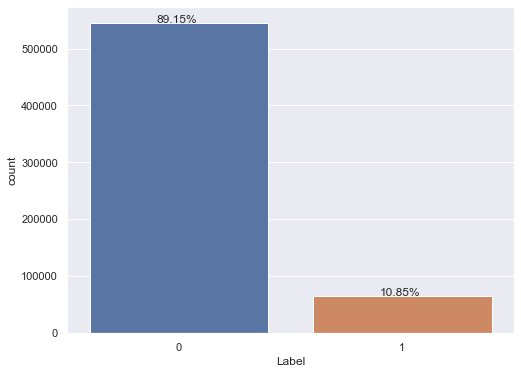

In [16]:
total = len(train['Label'])

plt.figure(figsize=(8,6))
ax = sns.countplot(x='Label', data=train)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/total), (p.get_x()+0.3, p.get_height()+5))

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

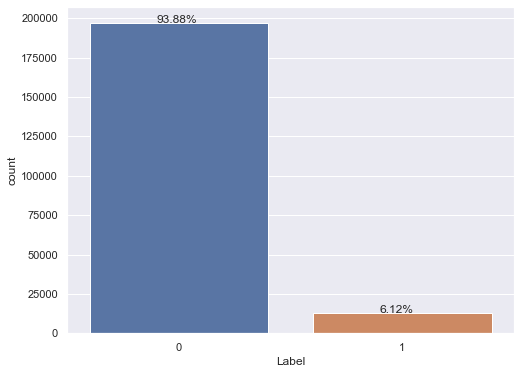

In [17]:
total = len(test['Label'])

plt.figure(figsize=(8,6))
ax = sns.countplot(x='Label', data=test)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/total), (p.get_x()+0.3, p.get_height()+5))

plt.show

From the above plots, it is clear that we are dealing with an imbalanced data where the percentage of Label 0 is higher than that of Label 1. From the train set, the ratio of Label 0 to Label 1 is 89:11 while in the test set is 94:6.

We will remember this class imbalance when training our models and compare the performance of the models when the classes are balanced and when they are not to check if the class imbalance will affect the performance of our model.

### Creation of New Features
Next we proceed to create some new features from the already existing ones. From our join_date feature we can get the length of time a customer has been with the insurance. We will create this feature by subtracting the join_date from the current date.

To start we will change the data type of our join_date feature from an object to a datetime64 datatype

In [18]:
train['join_date'] = train['join_date'].astype('datetime64')
test['join_date'] = test['join_date'].astype('datetime64')

In [19]:
from datetime import datetime
import numpy as np
train['member_days'] = (datetime.now() - train['join_date'])/np.timedelta64(1, 'D')
train = train.drop('join_date', axis=1)
test['member_days'] = (datetime.now() - test['join_date'])/np.timedelta64(1, 'D')
test = test.drop('join_date', axis=1)
test.sample(2)

,ID,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,PCODE,Label,ID X PCODE,member_days
42560,FDDPY18,M,M,1975,1X1H,2A7I,T4MS,66FJ,0,FDDPY18 X 66FJ,969.700476
66910,Q2B2AU8,M,M,1980,30H5,2A7I,T4MS,SOP4,0,Q2B2AU8 X SOP4,969.700476


We will also create a new feature to represent the age of each customer. This feature can be generated by subracting the current year from the birth year of the customer which is given as a feature in our data.

In [20]:
train['age'] = 2020 - train['birth_year']
train = train.drop('birth_year', axis=1)
test['age'] = 2020 - test['birth_year']
test = test.drop('birth_year', axis=1)
train.sample(2)

,ID,sex,marital_status,branch_code,occupation_code,occupation_category_code,PCODE,Label,ID X PCODE,member_days,age
404921,N8M0KZC,M,M,XX25,QZYX,90QI,FM3X,0,N8M0KZC X FM3X,1343.700468,27
455734,O2KOVTI,M,M,748L,2A7I,T4MS,QBOL,0,O2KOVTI X QBOL,975.700468,35


It's important to note that we drop the join_date and birth_year columns after generating other new columns based on this columns. This is because the two features would basically have the same representation.

### Handling Outliers
The two features we have created; `age` and `member_days` are both represented with the int64 datatypes. These two features are also the only numerical features in our dataset and we'll therefore, check if there is any outliers in those features. Outliers are values that are abonormal to some extent, that is they fall far away from the rest of the data. This values are often out of human error during data capture or other unforseen reasons.

The following function will help us visually understand the distribution and the presence of outliers, if any, in the two features.

In [21]:
def plot_unibi_num(feature): 
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
    sns.distplot(train[feature], ax=ax[0])
    sns.boxplot(data=train, x='Label', y=feature, ax=ax[1])   
    
    plt.show()

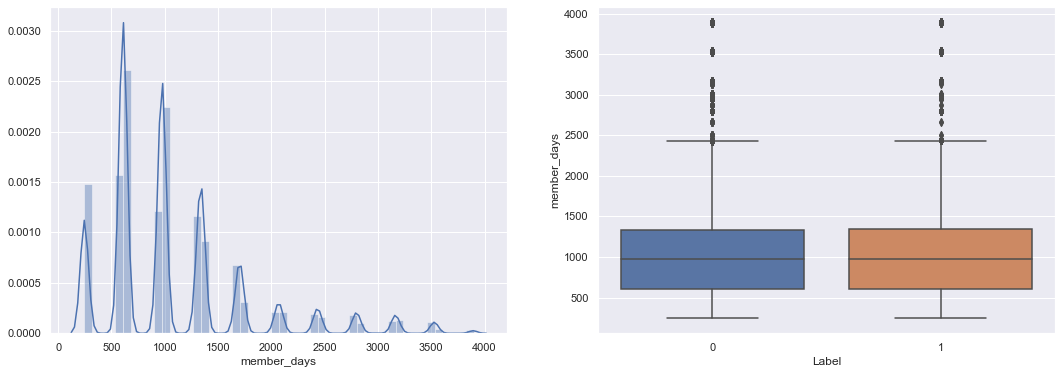

In [22]:
plot_unibi_num('member_days')

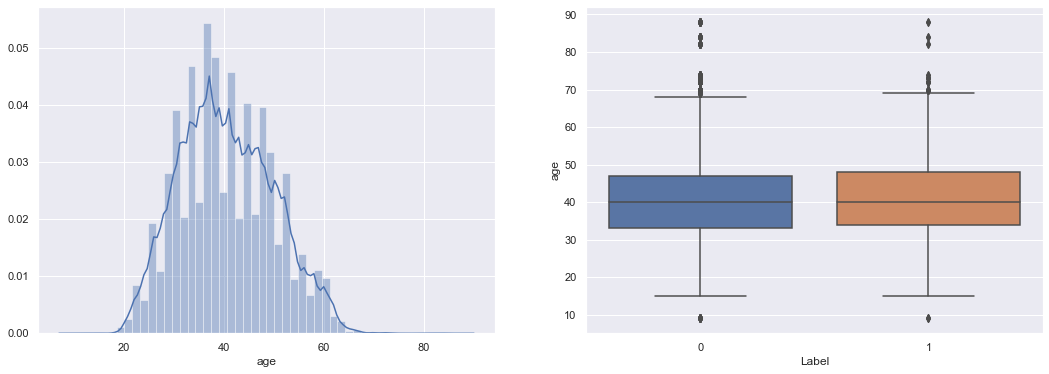

In [23]:
plot_unibi_num('age')

We notice that there are outliers in both our features and therefore, we will have to remove them since they may affect our model training. The following function will help us replace the outliers in our data and also plot the resulting features to ensure that the outliers have been successfully dealt with.

In [24]:
def replace_outlier(data, features, with_median=False, with_mean=False):
    for feature in features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
    
        median = data[feature].quantile(0.50)
        mean = data[feature].mean()
    
        IQR = Q3 - Q1
    
        upper_whisker = Q3 + (1.5 * IQR)
        lower_whisker = Q1 - (1.5 * IQR)
    
        if with_median:
            data[feature] = np.where(data[feature] > upper_whisker, median, data[feature])
            data[feature] = np.where(data[feature] < lower_whisker, median, data[feature])
    
        if with_mean:
            data[feature] = np.where(data[feature] > upper_whisker, mean, data[feature])
            data[feature] = np.where(data[feature] < lower_whisker, mean, data[feature])
            
def plot_outliers(data, features):
    fig, ax = plt.subplots(len(features), figsize = (8, 20))
    
    for i, feature in enumerate(features):
        sns.boxplot(y = data[feature], ax = ax[i])
        ax[i].set_title('Box plot - {}'.format(feature), fontsize = 10)
        ax[i].set_xlabel(feature, fontsize = 8)
    
    plt.show()

Then we call the functions and pass in our data and the age and member_days features. Finally we plot the boxplots to analyse the outliers and if they have been successfully replaced.

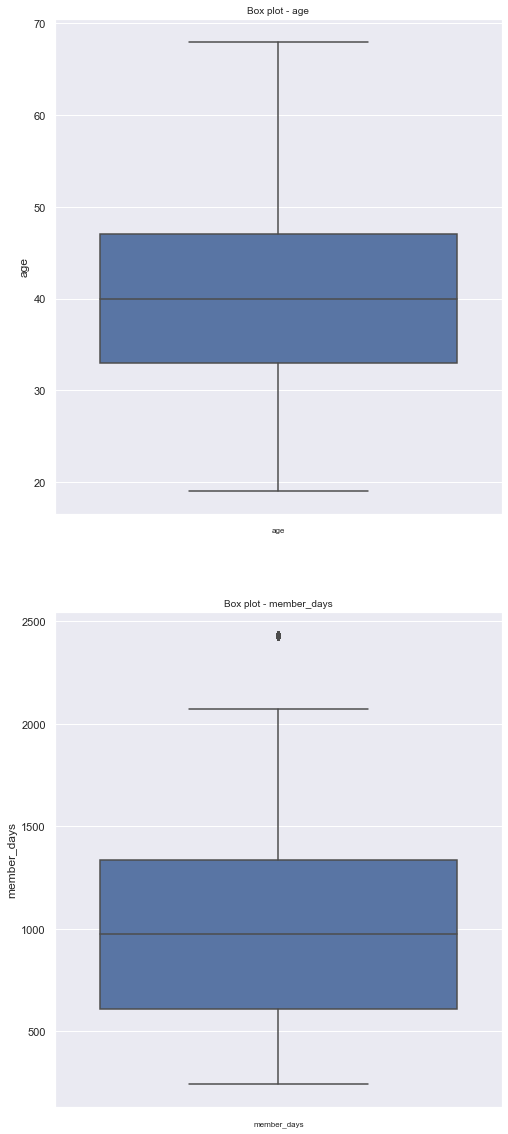

In [25]:
replace_outlier(test, ['age', 'member_days'], with_median=True)

plot_outliers(test, ['age', 'member_days'])

### Label encoding categorical features
Machine learning models only take in numerical figures as input and therefore, there is need to transform all our categorical features to a numerical form.

There are multiple ways of transforming categorical features to numerical form such as using get_dummies function in pandas or onehotencoding from scikit-learn. For this project, we will be using label encoding so that we remain with the same number of features. Both get_dummies and onehotencoding result in creation of other features. One of our categorical feature, occupation_code, had over 200 unique values and therefore using onehotencoding or get_dummies will result in a lot of unwanted new features.

Labelencoding simply assigns a number from 1 to all the unique features in a categorical feature.

The following defined function will help us apply labelencoding to all the categorical features at a go since LabelEncoder() only transforms one feature at a time.

In [26]:
from sklearn import preprocessing as p
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = p.LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = p.LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [27]:
train = MultiColumnLabelEncoder(columns = ['ID','sex', 'marital_status', 'branch_code', 'occupation_code','occupation_category_code','PCODE']).fit_transform(train)

In [28]:
test = MultiColumnLabelEncoder(columns = ['ID','sex', 'marital_status', 'branch_code', 'occupation_code','occupation_category_code','PCODE']).fit_transform(test)

After these data transformation we can inspect our data now to see its representation.

In [29]:
train.sample(2)

,ID,sex,marital_status,branch_code,occupation_code,occupation_category_code,PCODE,Label,ID X PCODE,member_days,age
215329,10391,1,5,3,3,5,19,1,CUF0ZXK X RVSZ,2797.700468,37
306467,8844,0,1,6,17,5,14,0,AWU17HY X N2MW,609.700468,40


We can then continue to plot a correlation matrix to understand the correlation of each feature to our target variable to understand which features are worth keeping for model training and which ones can be discarded without great effect on the model training.

<AxesSubplot:>

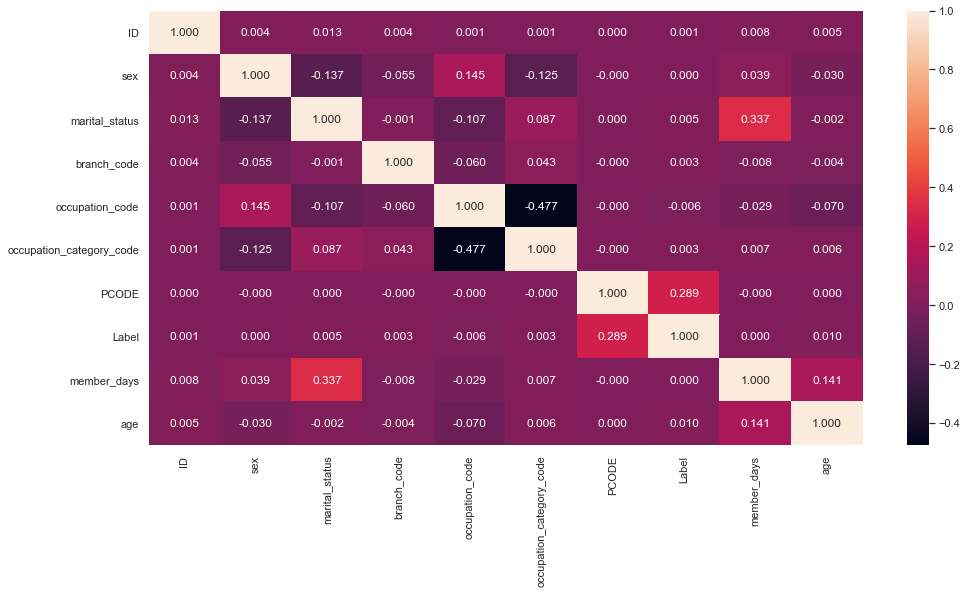

In [30]:
f, ax = plt.subplots(figsize = (16, 8))
corr = train.corr()
sns.heatmap(corr, annot = True, fmt = '.3f', annot_kws = {'size':12}, xticklabels = corr.columns.values, yticklabels = corr.columns.values)

All our features have a positive correlation to the target variable no matter how low except the occupation_code feature which has a negative correlation to the target variable. We will therefore, drop this feature along with the unique identifier for our customer.

We will also procedd to split our features from the target variable in both the train and test sets. Therefore, we will also drop the Label features from each dataset. The created column that will aid in submission will also be dropped from our dataset and will only be concatenated to our submission file.

In [31]:
y_train = train.Label
y_test = test.Label
X_train = train.drop(['ID','Label', 'occupation_code', 'ID X PCODE'], axis=1)
X_test = test.drop(['ID', 'Label', 'occupation_code', 'ID X PCODE'], axis=1)

We can now inspect our datasets while also checking if there is any missing values in our dataset.

In [32]:
print(X_train.shape, y_train.shape); print(X_test.shape, y_test.shape)

(611772, 7) (611772,)
(210000, 7) (210000,)


In [33]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210000 entries, 0 to 209999
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   sex                       210000 non-null  int32  
 1   marital_status            210000 non-null  int32  
 2   branch_code               210000 non-null  int32  
 3   occupation_category_code  210000 non-null  int32  
 4   PCODE                     210000 non-null  int32  
 5   member_days               209979 non-null  float64
 6   age                       210000 non-null  float64
dtypes: float64(2), int32(5)
memory usage: 7.2 MB


We can see that the member_days feature has some values missing. We will therefore, impute these missing values by filling them with the mean of the column instead of dropping all the 21 rows.

In [34]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

In [35]:
X_test.isnull().values.any()

False

### Data Normalization
Now we have data ready for training but each feature has its own scale. We will therefore, normalize our dataset using standardscaler for easy and scaled data to be used for training.

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns = X_train.columns   

#normalize train set
cols = X_train.values
    
temp_cols = scaler.fit_transform(cols)
X_train = pd.DataFrame(temp_cols, columns = columns)
    
#normalizing test set   
cols = X_test.values
    
temp_cols = scaler.fit_transform(cols)
X_test = pd.DataFrame(temp_cols, columns = columns)

In [37]:
X_train.sample(5)

,sex,marital_status,branch_code,occupation_category_code,PCODE,member_days,age
222406,-1.519647,-0.499734,-0.655245,0.714479,1.486301,-0.154835,-1.338589
508930,0.658048,-0.499734,-0.891903,0.714479,0.165145,-0.676083,0.806081
182481,0.658048,-0.499734,-0.418587,0.714479,1.651446,0.897686,0.162680
275835,0.658048,-0.499734,-0.418587,0.714479,0.495434,-1.191603,0.698847
531429,0.658048,-0.499734,1.947993,0.714479,-0.165145,1.416071,-0.373488


### Handling Class Imbalance
Finally, before proceeding to model training let's create a new dataset that handles the class imbalance we noticed earlier so that we can test each model with a balanced and with an imbalanced data to test the performance of the model.

To handel the class imbalance, we will oversample our data using SMOTE technique. This technique works by creating synthetic data based on the current dataset.

In [38]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state = 0)

columns = X_train.columns
os_data_X, os_data_y = os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['Label'])

#we can inspect the numbers of our data
print('length of oversampled data is ', len(os_data_X))
print('Number of Label 0 in oversampled data ', len(os_data_y['Label']==0))
print('Number of Label 1 in oversampled data ', len(os_data_y['Label']==1))
print('Proportion of Label 0 data in oversampled data is ', len(os_data_y[os_data_y['Label']==0])/len(os_data_X))
print('Proportion of Label 1 data in oversampled data is ', len(os_data_y[os_data_y['Label']==1])/len(os_data_X))

length of oversampled data is  1090838
Number of Label 0 in oversampled data  1090838
Number of Label 1 in oversampled data  1090838
Proportion of Label 0 data in oversampled data is  0.5
Proportion of Label 1 data in oversampled data is  0.5


In [39]:
os_data_y = os_data_y.Label
print(os_data_X.shape, os_data_y.shape)
print(X_test.shape, y_test.shape)

(1090838, 7) (1090838,)
(210000, 7) (210000,)


Now we have our two datasets ready for model training; an oversampled data and a normal pre-processed data.
The next section of the challenge will test different Machine Learning Algorithms, apply hyperparameter tuning and other techniques to enhance the performance of the model.